In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
df = pd.read_csv('Loan_status_2007-2020Q3.csv')
df

C:\Users\LEGION\AppData\Local\Temp\ipykernel_30256\1897270027.py:1: DtypeWarning: Columns (1,48,58,117,127,128,129,132,133,134,137) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Loan_status_2007-2020Q3.csv')


,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag
0,0,1077501,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
1,1,1077430,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
2,2,1077175,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
3,3,1076863,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
4,4,1075358,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925488,105446,102556443,24000.0,24000.0,24000.0,60 months,23.99%,690.30,E,E2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
2925489,105447,102653304,10000.0,10000.0,10000.0,36 months,7.99%,313.32,A,A5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
2925490,105448,102628603,10050.0,10050.0,10050.0,36 months,16.99%,358.26,D,D1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
2925491,105449,102196576,6000.0,6000.0,6000.0,36 months,11.44%,197.69,B,B4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N


In [3]:
df['total_il_high_credit_limit'].value_counts()

total_il_high_credit_limit
0.0         326839
10000.0      20192
15000.0      14588
20000.0      12559
5000.0       11658
             ...  
259937.0         1
268499.0         1
161127.0         1
237366.0         1
205765.0         1
Name: count, Length: 213510, dtype: int64

In [4]:
use_cols = [
    'id',
    'loan_amnt',  # Số dư nợ của người vay
    'term',  # Kỳ hạn vay
    'int_rate',  # Lãi suất của khoản vay
    'grade',  # Xếp hạng tín dụng của khoản vay
    'emp_length',  # Thời gian làm việc của người vay tính bằng năm trong công việc hiện tại
    'home_ownership',  # Tình trạng sở hữu nhà: RENT, OWN, MORTGAGE, OTHER
    'annual_inc',  # Thu nhập hàng năm của người vay
    'issue_d',  # Tháng mà khoản vay được giải ngân
    'loan_status',  # Trạng thái hiện tại của khoản vay
    'purpose',  # Mục đích vay
    'dti',  # Debt to Income: Tỉ lệ khoản phải trả hàng tháng bao gồm tiền lãi/tổng thu nhập
    'earliest_cr_line',  # Tháng của dòng tín dụng đầu tiên được báo cáo của người vay
    'application_type',  # Một cá nhân vay hay là đồng chung 2 người vay
    'pub_rec_bankruptcies',  # Số vụ phá sản được ghi nhận công khai
    'chargeoff_within_12_mths'  # Số lần charge-off trong vòng 12 tháng
]


In [5]:
df_selected = df[use_cols]
df_selected

,id,loan_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,issue_d,loan_status,purpose,dti,earliest_cr_line,application_type,pub_rec_bankruptcies,chargeoff_within_12_mths
0,1077501,5000.0,36 months,10.65%,B,10+ years,RENT,24000.0,Dec-2011,Fully Paid,credit_card,27.65,Jan-1985,Individual,0.0,0.0
1,1077430,2500.0,60 months,15.27%,C,< 1 year,RENT,30000.0,Dec-2011,Charged Off,car,1.00,Apr-1999,Individual,0.0,0.0
2,1077175,2400.0,36 months,15.96%,C,10+ years,RENT,12252.0,Dec-2011,Fully Paid,small_business,8.72,Nov-2001,Individual,0.0,0.0
3,1076863,10000.0,36 months,13.49%,C,10+ years,RENT,49200.0,Dec-2011,Fully Paid,other,20.00,Feb-1996,Individual,0.0,0.0
4,1075358,3000.0,60 months,12.69%,B,1 year,RENT,80000.0,Dec-2011,Fully Paid,other,17.94,Jan-1996,Individual,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925488,102556443,24000.0,60 months,23.99%,E,< 1 year,RENT,107000.0,Apr-2017,Charged Off,other,11.65,Apr-1995,Individual,1.0,1.0
2925489,102653304,10000.0,36 months,7.99%,A,10+ years,MORTGAGE,65000.0,Apr-2017,Fully Paid,debt_consolidation,19.55,Sep-1993,Individual,0.0,0.0
2925490,102628603,10050.0,36 months,16.99%,D,8 years,RENT,37000.0,Apr-2017,Charged Off,debt_consolidation,20.56,May-1993,Individual,0.0,0.0
2925491,102196576,6000.0,36 months,11.44%,B,5 years,RENT,41000.0,Apr-2017,Fully Paid,credit_card,19.99,May-1990,Individual,0.0,0.0


In [6]:
df_selected.shape

(2925493, 16)

# **Overview the data:**

## Check info & missing values:

In [7]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2925493 entries, 0 to 2925492
Data columns (total 16 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   id                        object 
 1   loan_amnt                 float64
 2   term                      object 
 3   int_rate                  object 
 4   grade                     object 
 5   emp_length                object 
 6   home_ownership            object 
 7   annual_inc                float64
 8   issue_d                   object 
 9   loan_status               object 
 10  purpose                   object 
 11  dti                       float64
 12  earliest_cr_line          object 
 13  application_type          object 
 14  pub_rec_bankruptcies      float64
 15  chargeoff_within_12_mths  float64
dtypes: float64(5), object(11)
memory usage: 357.1+ MB


In [8]:
df_selected.isna().sum()

id                               0
loan_amnt                        1
term                             1
int_rate                         1
grade                            1
emp_length                  205221
home_ownership                   1
annual_inc                       5
issue_d                          1
loan_status                      1
purpose                          1
dti                           3109
earliest_cr_line                30
application_type                 1
pub_rec_bankruptcies          1366
chargeoff_within_12_mths       146
dtype: int64

In [9]:
df_selected.dropna(inplace=True)
df_selected.isna().sum()

C:\Users\LEGION\AppData\Local\Temp\ipykernel_30256\4132730757.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.dropna(inplace=True)


id                          0
loan_amnt                   0
term                        0
int_rate                    0
grade                       0
emp_length                  0
home_ownership              0
annual_inc                  0
issue_d                     0
loan_status                 0
purpose                     0
dti                         0
earliest_cr_line            0
application_type            0
pub_rec_bankruptcies        0
chargeoff_within_12_mths    0
dtype: int64

## **Define type of data**

In [10]:
df_selected.dtypes.unique()

array([dtype('O'), dtype('float64')], dtype=object)

In [11]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2718623 entries, 0 to 2925492
Data columns (total 16 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   id                        object 
 1   loan_amnt                 float64
 2   term                      object 
 3   int_rate                  object 
 4   grade                     object 
 5   emp_length                object 
 6   home_ownership            object 
 7   annual_inc                float64
 8   issue_d                   object 
 9   loan_status               object 
 10  purpose                   object 
 11  dti                       float64
 12  earliest_cr_line          object 
 13  application_type          object 
 14  pub_rec_bankruptcies      float64
 15  chargeoff_within_12_mths  float64
dtypes: float64(5), object(11)
memory usage: 352.6+ MB


In [12]:
date_col = ['issue_d', 'earliest_cr_line']
df_selected[date_col] = df_selected[date_col].apply(pd.to_datetime)

C:\Users\LEGION\AppData\Local\Temp\ipykernel_30256\3152928909.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_selected[date_col] = df_selected[date_col].apply(pd.to_datetime)
C:\Users\LEGION\AppData\Local\Temp\ipykernel_30256\3152928909.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_selected[date_col] = df_selected[date_col].apply(pd.to_datetime)
C:\Users\LEGION\AppData\Local\Temp\ipykernel_30256\3152928909.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [13]:
categorical_cols = ['term' ,'grade','home_ownership', 'purpose','application_type', 'loan_status']
for col in categorical_cols:
    df_selected[col] = df_selected[col].str.strip()
    df_selected[col] = df_selected[col].astype('category')

C:\Users\LEGION\AppData\Local\Temp\ipykernel_30256\2846013925.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected[col] = df_selected[col].str.strip()
C:\Users\LEGION\AppData\Local\Temp\ipykernel_30256\2846013925.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected[col] = df_selected[col].astype('category')
C:\Users\LEGION\AppData\Local\Temp\ipykernel_30256\2846013925.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

In [14]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2718623 entries, 0 to 2925492
Data columns (total 16 columns):
 #   Column                    Dtype         
---  ------                    -----         
 0   id                        object        
 1   loan_amnt                 float64       
 2   term                      category      
 3   int_rate                  object        
 4   grade                     category      
 5   emp_length                object        
 6   home_ownership            category      
 7   annual_inc                float64       
 8   issue_d                   datetime64[ns]
 9   loan_status               category      
 10  purpose                   category      
 11  dti                       float64       
 12  earliest_cr_line          datetime64[ns]
 13  application_type          category      
 14  pub_rec_bankruptcies      float64       
 15  chargeoff_within_12_mths  float64       
dtypes: category(6), datetime64[ns](2), float64(5), object(3)
me

In [15]:
def convert_int_rate(x):
    s = re.compile(r"^\s*(\d*\.?\d*)").search(x).group(1)
    return float(s)

#convert_int_rate(" 123.45%")
df_selected['int_rate'] = df_selected['int_rate'].apply(convert_int_rate)

C:\Users\LEGION\AppData\Local\Temp\ipykernel_30256\1363513225.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['int_rate'] = df_selected['int_rate'].apply(convert_int_rate)


In [16]:
df_selected

,id,loan_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,issue_d,loan_status,purpose,dti,earliest_cr_line,application_type,pub_rec_bankruptcies,chargeoff_within_12_mths
0,1077501,5000.0,36 months,10.65,B,10+ years,RENT,24000.0,2011-12-01,Fully Paid,credit_card,27.65,1985-01-01,Individual,0.0,0.0
1,1077430,2500.0,60 months,15.27,C,< 1 year,RENT,30000.0,2011-12-01,Charged Off,car,1.00,1999-04-01,Individual,0.0,0.0
2,1077175,2400.0,36 months,15.96,C,10+ years,RENT,12252.0,2011-12-01,Fully Paid,small_business,8.72,2001-11-01,Individual,0.0,0.0
3,1076863,10000.0,36 months,13.49,C,10+ years,RENT,49200.0,2011-12-01,Fully Paid,other,20.00,1996-02-01,Individual,0.0,0.0
4,1075358,3000.0,60 months,12.69,B,1 year,RENT,80000.0,2011-12-01,Fully Paid,other,17.94,1996-01-01,Individual,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925488,102556443,24000.0,60 months,23.99,E,< 1 year,RENT,107000.0,2017-04-01,Charged Off,other,11.65,1995-04-01,Individual,1.0,1.0
2925489,102653304,10000.0,36 months,7.99,A,10+ years,MORTGAGE,65000.0,2017-04-01,Fully Paid,debt_consolidation,19.55,1993-09-01,Individual,0.0,0.0
2925490,102628603,10050.0,36 months,16.99,D,8 years,RENT,37000.0,2017-04-01,Charged Off,debt_consolidation,20.56,1993-05-01,Individual,0.0,0.0
2925491,102196576,6000.0,36 months,11.44,B,5 years,RENT,41000.0,2017-04-01,Fully Paid,credit_card,19.99,1990-05-01,Individual,0.0,0.0


In [17]:
df_selected['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years'],
      dtype=object)

In [18]:
def extract_emp_length_num(x):
    s = re.compile(r"(.+)year").search(x).group(1).strip()
    if s == '10+':
        return 10
    if s == '< 1':
        return 0
    return int(s)


df_selected['emp_length'] = df_selected['emp_length'].apply(extract_emp_length_num)

C:\Users\LEGION\AppData\Local\Temp\ipykernel_30256\848850401.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['emp_length'] = df_selected['emp_length'].apply(extract_emp_length_num)


In [19]:
df_selected

,id,loan_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,issue_d,loan_status,purpose,dti,earliest_cr_line,application_type,pub_rec_bankruptcies,chargeoff_within_12_mths
0,1077501,5000.0,36 months,10.65,B,10,RENT,24000.0,2011-12-01,Fully Paid,credit_card,27.65,1985-01-01,Individual,0.0,0.0
1,1077430,2500.0,60 months,15.27,C,0,RENT,30000.0,2011-12-01,Charged Off,car,1.00,1999-04-01,Individual,0.0,0.0
2,1077175,2400.0,36 months,15.96,C,10,RENT,12252.0,2011-12-01,Fully Paid,small_business,8.72,2001-11-01,Individual,0.0,0.0
3,1076863,10000.0,36 months,13.49,C,10,RENT,49200.0,2011-12-01,Fully Paid,other,20.00,1996-02-01,Individual,0.0,0.0
4,1075358,3000.0,60 months,12.69,B,1,RENT,80000.0,2011-12-01,Fully Paid,other,17.94,1996-01-01,Individual,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925488,102556443,24000.0,60 months,23.99,E,0,RENT,107000.0,2017-04-01,Charged Off,other,11.65,1995-04-01,Individual,1.0,1.0
2925489,102653304,10000.0,36 months,7.99,A,10,MORTGAGE,65000.0,2017-04-01,Fully Paid,debt_consolidation,19.55,1993-09-01,Individual,0.0,0.0
2925490,102628603,10050.0,36 months,16.99,D,8,RENT,37000.0,2017-04-01,Charged Off,debt_consolidation,20.56,1993-05-01,Individual,0.0,0.0
2925491,102196576,6000.0,36 months,11.44,B,5,RENT,41000.0,2017-04-01,Fully Paid,credit_card,19.99,1990-05-01,Individual,0.0,0.0


In [20]:
df_selected['loan_status'].value_counts()

loan_status
Fully Paid                                             1410670
Current                                                 946110
Charged Off                                             331691
Late (31-120 days)                                       14302
In Grace Period                                           9197
Late (16-30 days)                                         2337
Issued                                                    1903
Does not meet the credit policy. Status:Fully Paid        1514
Does not meet the credit policy. Status:Charged Off        530
Default                                                    369
Name: count, dtype: int64

In [21]:
replace_pattern = {
    'Fully Paid' : 0,
    'Current' : 0,
    'Charged Off' : 1,
    'Late (31-120 days)' : 1,
    'In Grace Period' : 1,
    'Late (16-30 days)' : 1,
    'Issued' : 0,
    'Does not meet the credit policy. Status:Fully Paid' : 0,
    'Does not meet the credit policy. Status:Charged Off' : 1,
    'Default' : 1
}

df_selected['loan_status'] = df_selected['loan_status'].replace(replace_pattern)
df_selected

C:\Users\LEGION\AppData\Local\Temp\ipykernel_30256\977983236.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['loan_status'] = df_selected['loan_status'].replace(replace_pattern)


,id,loan_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,issue_d,loan_status,purpose,dti,earliest_cr_line,application_type,pub_rec_bankruptcies,chargeoff_within_12_mths
0,1077501,5000.0,36 months,10.65,B,10,RENT,24000.0,2011-12-01,0,credit_card,27.65,1985-01-01,Individual,0.0,0.0
1,1077430,2500.0,60 months,15.27,C,0,RENT,30000.0,2011-12-01,1,car,1.00,1999-04-01,Individual,0.0,0.0
2,1077175,2400.0,36 months,15.96,C,10,RENT,12252.0,2011-12-01,0,small_business,8.72,2001-11-01,Individual,0.0,0.0
3,1076863,10000.0,36 months,13.49,C,10,RENT,49200.0,2011-12-01,0,other,20.00,1996-02-01,Individual,0.0,0.0
4,1075358,3000.0,60 months,12.69,B,1,RENT,80000.0,2011-12-01,0,other,17.94,1996-01-01,Individual,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925488,102556443,24000.0,60 months,23.99,E,0,RENT,107000.0,2017-04-01,1,other,11.65,1995-04-01,Individual,1.0,1.0
2925489,102653304,10000.0,36 months,7.99,A,10,MORTGAGE,65000.0,2017-04-01,0,debt_consolidation,19.55,1993-09-01,Individual,0.0,0.0
2925490,102628603,10050.0,36 months,16.99,D,8,RENT,37000.0,2017-04-01,1,debt_consolidation,20.56,1993-05-01,Individual,0.0,0.0
2925491,102196576,6000.0,36 months,11.44,B,5,RENT,41000.0,2017-04-01,0,credit_card,19.99,1990-05-01,Individual,0.0,0.0


## **Check duplicated values:**

In [22]:
df_selected.duplicated().unique()

array([False])

## **Check imbalanced:**

In [23]:
label_ratio = df_selected['loan_status'].value_counts(normalize=True)
label_ratio

loan_status
0    0.868159
1    0.131841
Name: proportion, dtype: float64

The ration of label 1 on total is 13.2% &#8594; We can continue with the EDA and ML model

# **Start Feature Engineering & EDA**

In [24]:
df_selected['loan_status'].value_counts()

loan_status
0    2360197
1     358426
Name: count, dtype: int64

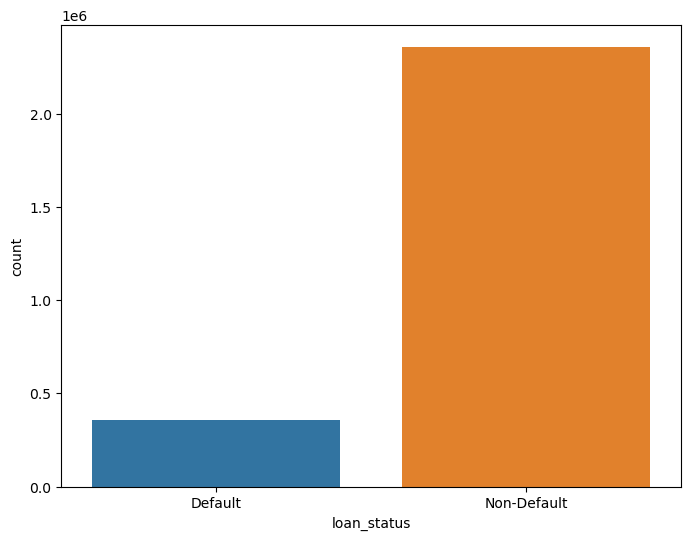

In [25]:
fig = plt.figure(figsize= (8, 6))
ax = sns.countplot(data = df_selected, x = 'loan_status')
ax.set_xticklabels(labels=['Default', 'Non-Default'])
plt.show()

In [26]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2718623 entries, 0 to 2925492
Data columns (total 16 columns):
 #   Column                    Dtype         
---  ------                    -----         
 0   id                        object        
 1   loan_amnt                 float64       
 2   term                      category      
 3   int_rate                  float64       
 4   grade                     category      
 5   emp_length                int64         
 6   home_ownership            category      
 7   annual_inc                float64       
 8   issue_d                   datetime64[ns]
 9   loan_status               category      
 10  purpose                   category      
 11  dti                       float64       
 12  earliest_cr_line          datetime64[ns]
 13  application_type          category      
 14  pub_rec_bankruptcies      float64       
 15  chargeoff_within_12_mths  float64       
dtypes: category(6), datetime64[ns](2), float64(6), int64(1), ob

## Numeric Features:

C:\Users\LEGION\AppData\Local\Temp\ipykernel_30256\3670608793.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_selected[col], shade=True)
C:\Users\LEGION\AppData\Local\Temp\ipykernel_30256\3670608793.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_selected[col], shade=True)
C:\Users\LEGION\AppData\Local\Temp\ipykernel_30256\3670608793.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_selected[col], shade=True)
C:\Users\LEGION\AppData\Local\Temp\ipykernel_30256\3670608793.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0

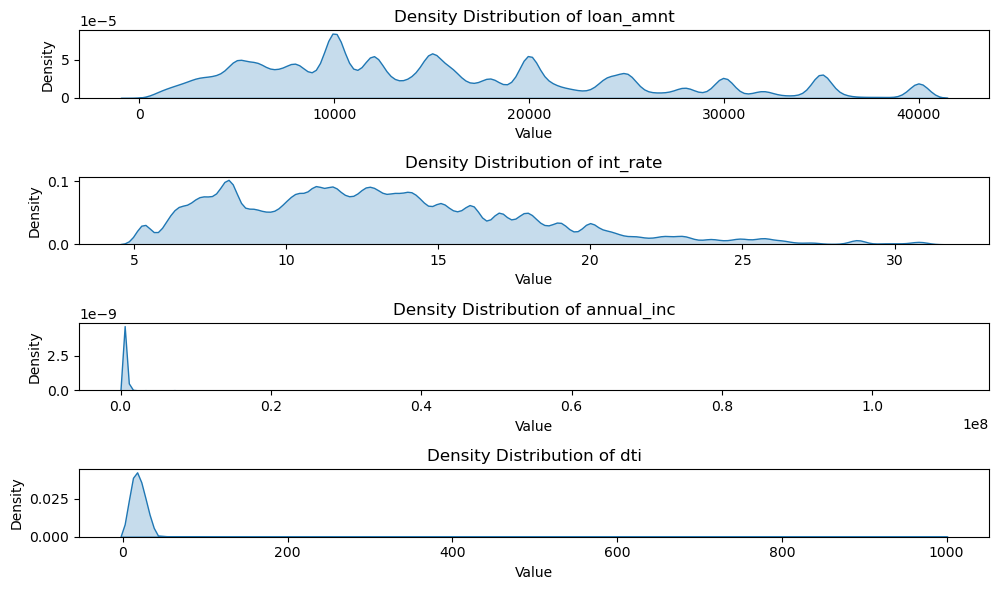

In [27]:
cols = ['loan_amnt','int_rate', 'annual_inc', 'dti']

plt.figure(figsize=(10, 6))

for i, col in enumerate(cols, 1):
    plt.subplot(len(cols), 1, i)
    sns.kdeplot(df_selected[col], shade=True)
    plt.title(f'Density Distribution of {col}')
    plt.xlabel('Value')
    plt.ylabel('Density')

plt.tight_layout()
plt.show()

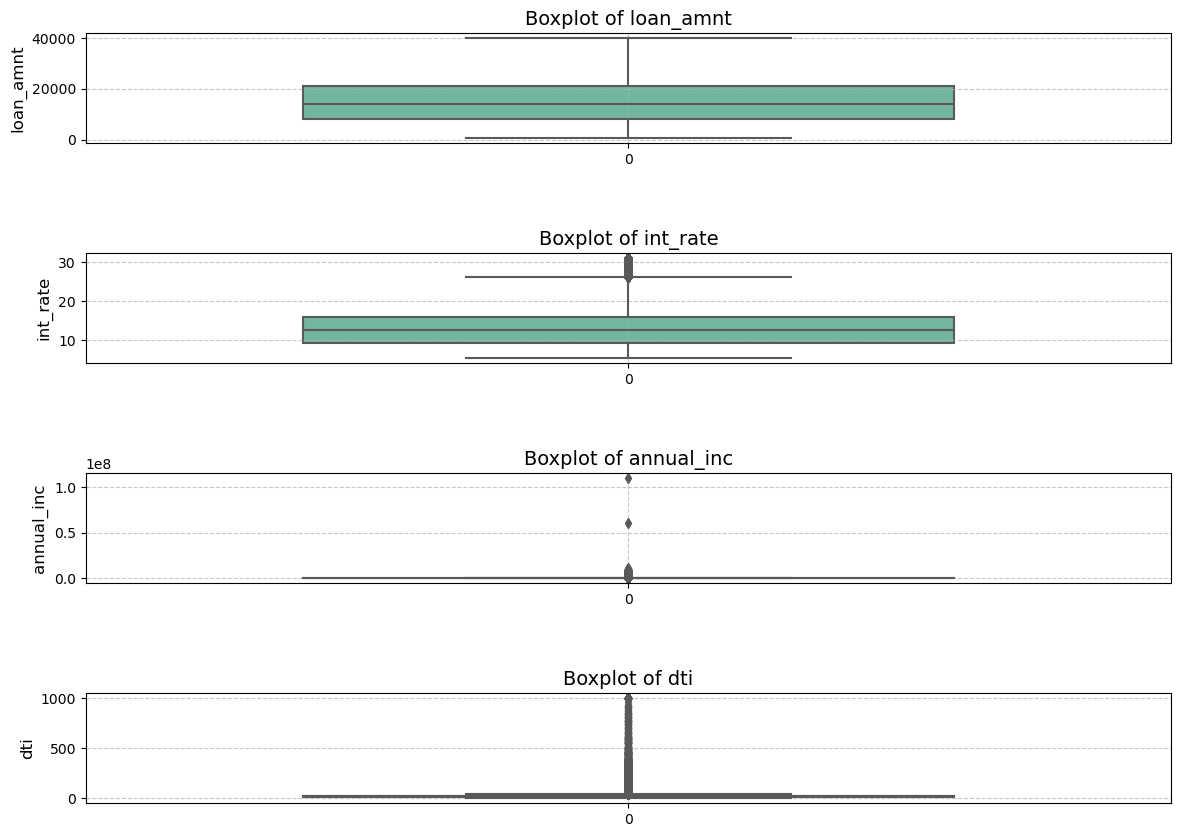

In [28]:
plt.figure(figsize=(14, 10))  # Tăng kích thước biểu đồ

for i, col in enumerate(cols, 1):
    plt.subplot(len(cols), 1, i)
    sns.boxplot(data=df_selected[col], width=0.6, palette="Set2")  # Tăng chiều rộng boxplot và đổi bảng màu
    plt.title(f'Boxplot of {col}', fontsize=14)  # Tăng kích thước font tiêu đề
    plt.ylabel(col, fontsize=12)  # Thêm nhãn cho trục y
    plt.grid(True, linestyle='--', alpha=0.7)  # Lưới nhẹ

plt.subplots_adjust(hspace=1)  # Tăng khoảng cách giữa các biểu đồ
plt.show()


From this distribution, we can see:
* loan_amnt: most amount of transactions centralize from <10000 to 30000
* int_rate:  mostly between 5% and 20%, with a tail extending beyond 25%
* annual_inc: annual_inc are mostly below 200000
* dti: dti are mostly below 50, with some values extending up to 1,000

### Check correlation:

In [29]:
num_cols = df_selected[['loan_amnt','int_rate','annual_inc','emp_length', 'dti','loan_status']]
num_cols

,loan_amnt,int_rate,annual_inc,emp_length,dti,loan_status
0,5000.0,10.65,24000.0,10,27.65,0
1,2500.0,15.27,30000.0,0,1.00,1
2,2400.0,15.96,12252.0,10,8.72,0
3,10000.0,13.49,49200.0,10,20.00,0
4,3000.0,12.69,80000.0,1,17.94,0
...,...,...,...,...,...,...
2925488,24000.0,23.99,107000.0,0,11.65,1
2925489,10000.0,7.99,65000.0,10,19.55,0
2925490,10050.0,16.99,37000.0,8,20.56,1
2925491,6000.0,11.44,41000.0,5,19.99,0


<Axes: >

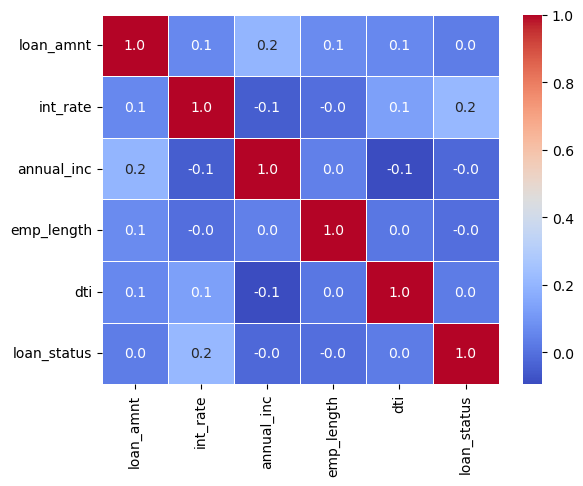

In [30]:
corr = num_cols.corr()
sns.heatmap(corr, annot=True, fmt=".1f", cmap='coolwarm', linewidths=.7)

In [31]:
df_selected

,id,loan_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,issue_d,loan_status,purpose,dti,earliest_cr_line,application_type,pub_rec_bankruptcies,chargeoff_within_12_mths
0,1077501,5000.0,36 months,10.65,B,10,RENT,24000.0,2011-12-01,0,credit_card,27.65,1985-01-01,Individual,0.0,0.0
1,1077430,2500.0,60 months,15.27,C,0,RENT,30000.0,2011-12-01,1,car,1.00,1999-04-01,Individual,0.0,0.0
2,1077175,2400.0,36 months,15.96,C,10,RENT,12252.0,2011-12-01,0,small_business,8.72,2001-11-01,Individual,0.0,0.0
3,1076863,10000.0,36 months,13.49,C,10,RENT,49200.0,2011-12-01,0,other,20.00,1996-02-01,Individual,0.0,0.0
4,1075358,3000.0,60 months,12.69,B,1,RENT,80000.0,2011-12-01,0,other,17.94,1996-01-01,Individual,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925488,102556443,24000.0,60 months,23.99,E,0,RENT,107000.0,2017-04-01,1,other,11.65,1995-04-01,Individual,1.0,1.0
2925489,102653304,10000.0,36 months,7.99,A,10,MORTGAGE,65000.0,2017-04-01,0,debt_consolidation,19.55,1993-09-01,Individual,0.0,0.0
2925490,102628603,10050.0,36 months,16.99,D,8,RENT,37000.0,2017-04-01,1,debt_consolidation,20.56,1993-05-01,Individual,0.0,0.0
2925491,102196576,6000.0,36 months,11.44,B,5,RENT,41000.0,2017-04-01,0,credit_card,19.99,1990-05-01,Individual,0.0,0.0


## Category Features:

In [32]:
def count_percentage(df, column, target, count):
    '''
    This function to create the table calculate the percentage of Default/Non-Default by category values

    '''

    # Create 2 dataframes of Default/Non-Default
    default = df[df[target]==1].groupby(column)[[count]].count().reset_index().sort_values(ascending=False, by = count)
    non_default = df[df[target]==0].groupby(column)[[count]].count().reset_index().sort_values(ascending=False, by = count)

    #Merge 2 dataframe into one:
    cate_df = default.merge(non_default, on = column , how = 'outer')
    cate_df.rename(columns = {count+'_x':'default',count+'_y':'non_default'}, inplace = True)

    #Caculate the percentage:
    cate_df['%'] = cate_df['default']/(cate_df['default']+cate_df['non_default'])

    return cate_df


### Application_type:

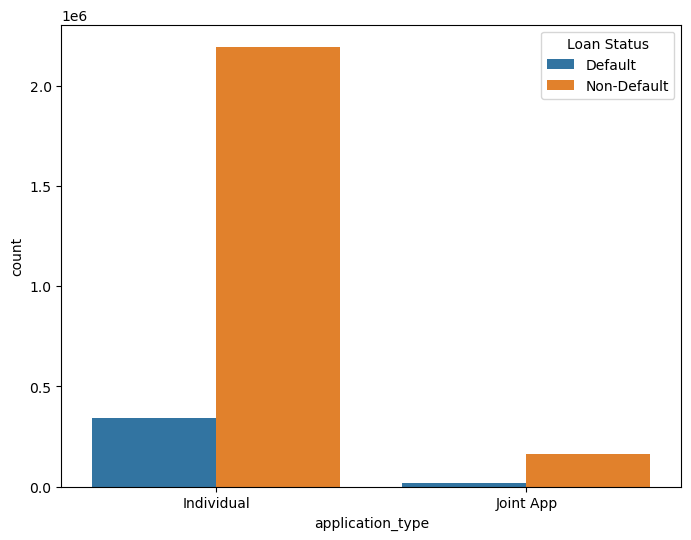

In [33]:
fig = plt.figure(figsize= (8, 6))
ax = sns.countplot(data = df_selected, x = 'application_type', hue ='loan_status')
ax.legend(labels=['Default', 'Non-Default'], title="Loan Status")
plt.show()

In [34]:
application_type_df = count_percentage(df_selected,'application_type','loan_status','id')
application_type_df.sort_values(by=['%','default'], ascending = False).head(5)

,application_type,default,non_default,%
0,Individual,340811,2196676,0.134310
1,Joint App,17615,163521,0.097247


* The majority of loans are from individual applicants, with a higher default rate (13.43%) compared to joint applications (9.72%), though individual loans dominate the dataset.

### Home_ownership:

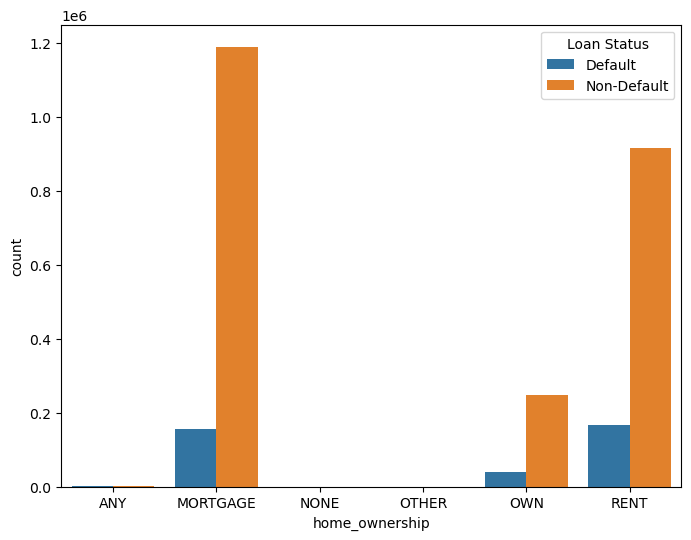

In [35]:
fig = plt.figure(figsize= (8, 6))
ax = sns.countplot(data = df_selected, x = 'home_ownership', hue ='loan_status')
ax.legend(labels=['Default', 'Non-Default'], title="Loan Status")
plt.show()

In [36]:
home_ownership_df = count_percentage(df_selected,'home_ownership','loan_status','id')
home_ownership_df.sort_values(by=['%','default'], ascending = False).head(5)

,home_ownership,default,non_default,%
4,OTHER,38,141,0.212291
0,RENT,165330,917487,0.152685
5,NONE,6,38,0.136364
2,OWN,38128,249072,0.132758
1,MORTGAGE,154664,1190760,0.114956


* Renters have the highest default rate (15.27%), suggesting that home ownership status influences loan default likelihood. Mortgage holders, despite having the largest loan count, show a lower default rate (11.49%), indicating more stability.

### Purpose:


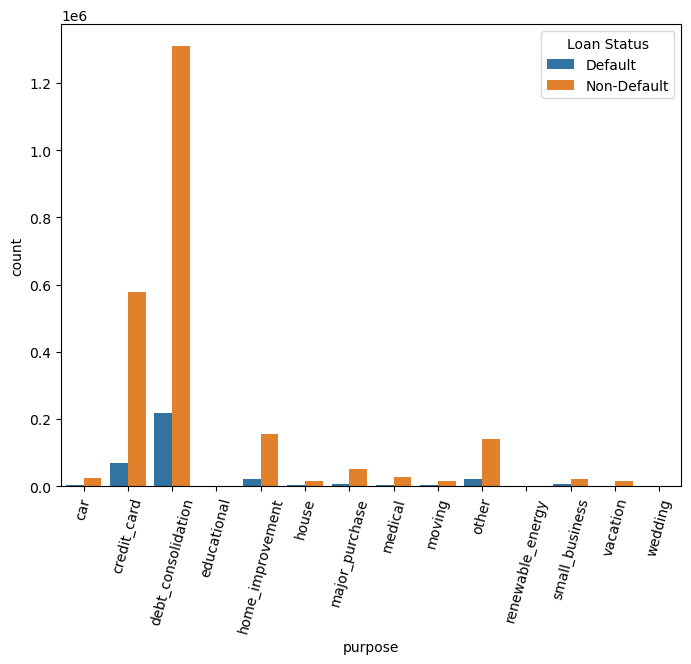

In [37]:
fig = plt.figure(figsize= (8, 6))
ax = sns.countplot(data = df_selected, x = 'purpose', hue ='loan_status')
ax.legend(labels=['Default', 'Non-Default'], title="Loan Status")
plt.xticks(rotation= 75)
plt.show()

In [38]:
purpose_df = count_percentage(df_selected,'purpose','loan_status','id')
purpose_df.sort_values(by=['%','default'], ascending = False)

,purpose,default,non_default,%
5,small_business,6066,22897,0.209440
13,educational,70,291,0.193906
11,renewable_energy,278,1370,0.168689
7,moving,2811,14901,0.158706
0,debt_consolidation,217129,1309229,0.142253
9,house,2514,15475,0.139752
2,other,22242,139980,0.137108
6,medical,4299,27257,0.136234
4,major_purchase,7734,50713,0.132325
10,vacation,2290,16099,0.124531


* The plot shows that "Debt Consolidation" and "Credit Card" purposes have the highest number of non-default loans, with "Small Business" having the highest default percentage at 20.94%, followed by "Educational" at 19.39%.

### Grade:

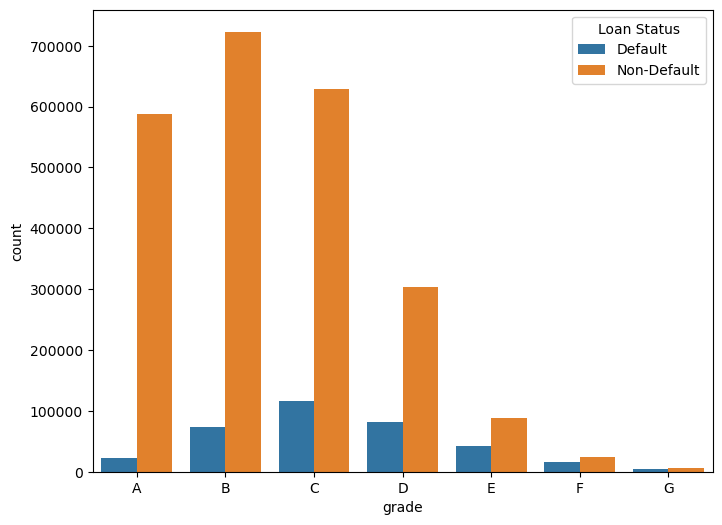

In [39]:
fig = plt.figure(figsize= (8, 6))
ax = sns.countplot(data = df_selected, x = 'grade', hue ='loan_status')
ax.legend(labels=['Default', 'Non-Default'], title="Loan Status")
plt.show()

In [40]:
grade_df = count_percentage(df_selected,'grade','loan_status','id')
grade_df.sort_values(by=['%','default'], ascending = False)

,grade,default,non_default,%
6,G,5060,6391,0.441883
5,F,15782,23588,0.400864
3,E,42130,87763,0.324344
1,D,81897,302831,0.212870
0,C,116868,628369,0.156820
2,B,73519,723149,0.092283
4,A,23170,588106,0.037904


* The default rate is highest for grade G at 44.18%, while grade A has the lowest default rate at 3.79%, indicating that lower credit grades have significantly higher default risks.

### Term:

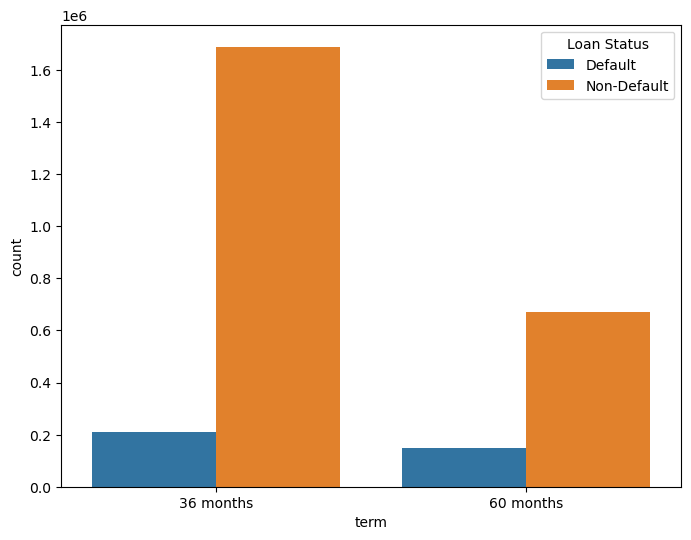

In [41]:
fig = plt.figure(figsize= (8, 6))
ax = sns.countplot(data = df_selected, x = 'term', hue ='loan_status')
ax.legend(labels=['Default', 'Non-Default'], title="Loan Status")
plt.show()

In [42]:
term_df = count_percentage(df_selected,'term','loan_status','id')
term_df.sort_values(by=['%','default'], ascending = False).head(5)

,term,default,non_default,%
1,60 months,147822,670672,0.180602
0,36 months,210604,1689525,0.110837


* The default rate is higher for loans with a 60-month term at 18.06%, compared to loans with a 36-month term, which have a default rate of 11.08%, indicating that longer-term loans are more likely to default.

### Annual_inc

In [43]:
df_selected['annual_inc'].describe()

count    2.718623e+06
mean     8.212958e+04
std      1.133429e+05
min      0.000000e+00
25%      4.991600e+04
50%      6.938900e+04
75%      9.800000e+04
max      1.100000e+08
Name: annual_inc, dtype: float64

In [44]:
annual_cat = ['Basic', 'Moderate', 'Premium', 'Exclusive']
df_selected['annual_inc_quatile'] = pd.qcut(x=df_selected['annual_inc'], q=4, labels = annual_cat)


C:\Users\LEGION\AppData\Local\Temp\ipykernel_30256\2144216462.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['annual_inc_quatile'] = pd.qcut(x=df_selected['annual_inc'], q=4, labels = annual_cat)


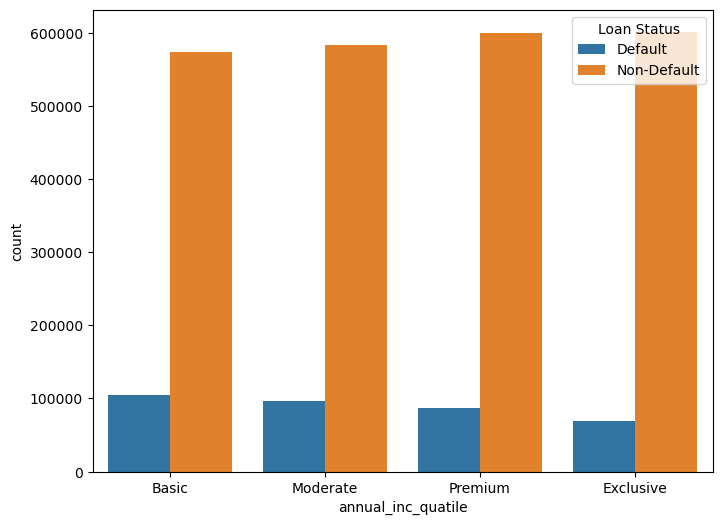

In [45]:
fig = plt.figure(figsize= (8, 6))
ax = sns.countplot(data = df_selected, x = 'annual_inc_quatile', hue ='loan_status')
ax.legend(labels=['Default', 'Non-Default'], title="Loan Status")
plt.show()

In [46]:
annual_inc_quatile_df = count_percentage(df_selected,'annual_inc_quatile','loan_status','id')
annual_inc_quatile_df.sort_values(by=['%','default'], ascending = False).head(5)

,annual_inc_quatile,default,non_default,%
0,Basic,105199,574458,0.154782
1,Moderate,96082,583573,0.141369
2,Premium,87454,600341,0.127151
3,Exclusive,69691,601825,0.103782


* The trend shows that as income increases, the percentage of defaults decreases. Specifically, the "Basic" income group has the highest default rate (15.48%), while the "Exclusive" income group has the lowest (10.38%). This suggests that higher income is associated with a lower likelihood of default.

### Emp_length:

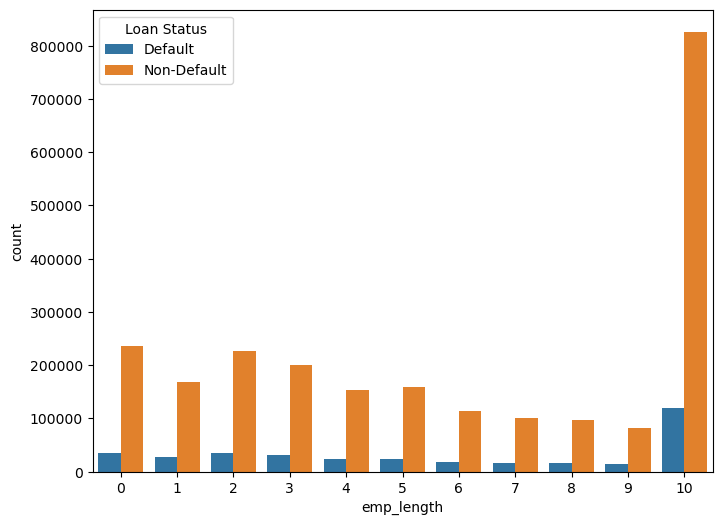

In [47]:
fig = plt.figure(figsize= (8, 6))
ax = sns.countplot(data = df_selected, x = 'emp_length', hue ='loan_status')
ax.legend(labels=['Default', 'Non-Default'], title="Loan Status")
plt.show()

In [48]:
emp_length_df = count_percentage(df_selected,'emp_length','loan_status','id')
emp_length_df.sort_values(by=['%','default'], ascending = False)

,emp_length,default,non_default,%
8,8,16098,96571,0.142879
10,9,13488,81895,0.141409
4,1,26641,167324,0.137350
9,7,15832,100193,0.136453
3,3,31467,200701,0.135535
6,4,23715,152333,0.134708
2,2,34925,226764,0.133460
7,6,17341,113332,0.132705
5,5,24187,158097,0.132689
1,0,35094,236614,0.129161


* Employment length shows a similar distribution for defaults and non-defaults, indicating it may not significantly influence loan default rates

# Prepare data

In [49]:
data = df_selected.copy()
data

,id,loan_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,issue_d,loan_status,purpose,dti,earliest_cr_line,application_type,pub_rec_bankruptcies,chargeoff_within_12_mths,annual_inc_quatile
0,1077501,5000.0,36 months,10.65,B,10,RENT,24000.0,2011-12-01,0,credit_card,27.65,1985-01-01,Individual,0.0,0.0,Basic
1,1077430,2500.0,60 months,15.27,C,0,RENT,30000.0,2011-12-01,1,car,1.00,1999-04-01,Individual,0.0,0.0,Basic
2,1077175,2400.0,36 months,15.96,C,10,RENT,12252.0,2011-12-01,0,small_business,8.72,2001-11-01,Individual,0.0,0.0,Basic
3,1076863,10000.0,36 months,13.49,C,10,RENT,49200.0,2011-12-01,0,other,20.00,1996-02-01,Individual,0.0,0.0,Basic
4,1075358,3000.0,60 months,12.69,B,1,RENT,80000.0,2011-12-01,0,other,17.94,1996-01-01,Individual,0.0,0.0,Premium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925488,102556443,24000.0,60 months,23.99,E,0,RENT,107000.0,2017-04-01,1,other,11.65,1995-04-01,Individual,1.0,1.0,Exclusive
2925489,102653304,10000.0,36 months,7.99,A,10,MORTGAGE,65000.0,2017-04-01,0,debt_consolidation,19.55,1993-09-01,Individual,0.0,0.0,Moderate
2925490,102628603,10050.0,36 months,16.99,D,8,RENT,37000.0,2017-04-01,1,debt_consolidation,20.56,1993-05-01,Individual,0.0,0.0,Basic
2925491,102196576,6000.0,36 months,11.44,B,5,RENT,41000.0,2017-04-01,0,credit_card,19.99,1990-05-01,Individual,0.0,0.0,Basic


In [50]:
data['application_type'].unique()

['Individual', 'Joint App']
Categories (2, object): ['Individual', 'Joint App']

In [51]:
data['application_type'] = data['application_type'].replace('Joint App', 'Joint_App')
data['application_type'].unique()

['Individual', 'Joint_App']
Categories (2, object): ['Individual', 'Joint_App']

In [52]:
data['term'] = data['term'].apply(lambda x: x.replace(' ', '_'))
data['term'].unique()

['36_months', '60_months']
Categories (2, object): ['36_months', '60_months']

In [53]:
col_dummies = {
    'term' : 'term'
    , 'application_type' : 'app_type'
    , 'home_ownership' : 'home_ownership'
    , 'grade' : 'grade'
    , 'purpose' : 'purpose'
    , 'annual_inc_quatile' : 'annual_inc'
}
data = pd.get_dummies(data, columns= list(col_dummies.keys()), prefix=list(col_dummies.values()))
data

,id,loan_amnt,int_rate,emp_length,annual_inc,issue_d,loan_status,dti,earliest_cr_line,pub_rec_bankruptcies,...,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,annual_inc_Basic,annual_inc_Moderate,annual_inc_Premium,annual_inc_Exclusive
0,1077501,5000.0,10.65,10,24000.0,2011-12-01,0,27.65,1985-01-01,0.0,...,False,False,False,False,False,False,True,False,False,False
1,1077430,2500.0,15.27,0,30000.0,2011-12-01,1,1.00,1999-04-01,0.0,...,False,False,False,False,False,False,True,False,False,False
2,1077175,2400.0,15.96,10,12252.0,2011-12-01,0,8.72,2001-11-01,0.0,...,False,False,False,True,False,False,True,False,False,False
3,1076863,10000.0,13.49,10,49200.0,2011-12-01,0,20.00,1996-02-01,0.0,...,False,True,False,False,False,False,True,False,False,False
4,1075358,3000.0,12.69,1,80000.0,2011-12-01,0,17.94,1996-01-01,0.0,...,False,True,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925488,102556443,24000.0,23.99,0,107000.0,2017-04-01,1,11.65,1995-04-01,1.0,...,False,True,False,False,False,False,False,False,False,True
2925489,102653304,10000.0,7.99,10,65000.0,2017-04-01,0,19.55,1993-09-01,0.0,...,False,False,False,False,False,False,False,True,False,False
2925490,102628603,10050.0,16.99,8,37000.0,2017-04-01,1,20.56,1993-05-01,0.0,...,False,False,False,False,False,False,True,False,False,False
2925491,102196576,6000.0,11.44,5,41000.0,2017-04-01,0,19.99,1990-05-01,0.0,...,False,False,False,False,False,False,True,False,False,False


In [54]:
data.columns

Index(['id', 'loan_amnt', 'int_rate', 'emp_length', 'annual_inc', 'issue_d',
       'loan_status', 'dti', 'earliest_cr_line', 'pub_rec_bankruptcies',
       'chargeoff_within_12_mths', 'term_36_months', 'term_60_months',
       'app_type_Individual', 'app_type_Joint_App', 'home_ownership_ANY',
       'home_ownership_MORTGAGE', 'home_ownership_NONE',
       'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT',
       'grade_A', 'grade_B', 'grade_C', 'grade_D', 'grade_E', 'grade_F',
       'grade_G', 'purpose_car', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'annual_inc_Basic',
       'annual_inc_Moderate', 'annual_inc_Premium', 'annual_inc_Exclusive'],
      dtype='object')

# Build Model

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, accuracy_score, roc_curve, roc_auc_score

In [56]:
X = data.drop(['id','loan_status','annual_inc','issue_d','earliest_cr_line'], axis =1)
y = data['loan_status']

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42) 

In [58]:
y_train.value_counts()

loan_status
0    1652371
1     250665
Name: count, dtype: int64

## Imbalance Data

In [59]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy="minority", random_state = 81)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [60]:
y_train_resampled.value_counts()

loan_status
1    1652371
0    1652371
Name: count, dtype: int64

## LogisticRegression

In [65]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_train_resampled, y_train_resampled)

C:\Users\LEGION\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [66]:
lr_y_preds = lr_model.predict(X_test)
lr_y_preds

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [67]:
lr_y_proba_preds = lr_model.predict_proba(X_test)
lr_y_proba_preds

array([[0.59843836, 0.40156164],
       [0.5992198 , 0.4007802 ],
       [0.4027657 , 0.5972343 ],
       ...,
       [0.63175419, 0.36824581],
       [0.73949436, 0.26050564],
       [0.63327139, 0.36672861]])

In [68]:
y_test

1991199    0
2686378    0
1220354    0
982880     0
2785650    0
          ..
2861102    0
2086750    1
1203510    0
2370444    0
2240236    0
Name: loan_status, Length: 815587, dtype: category
Categories (2, int64): [1, 0]

In [71]:
lr_result_df = pd.concat([
    pd.DataFrame(y_test.reset_index(drop=True)),
    pd.DataFrame(lr_y_preds, columns= ["lr_pred"]),
    pd.DataFrame(lr_y_proba_preds[:,1], columns= ["lr_pred_proba"])
], axis = 1)
lr_result_df

,loan_status,lr_pred,lr_pred_proba
0,0,0,0.401562
1,0,0,0.400780
2,0,1,0.597234
3,0,0,0.463055
4,0,1,0.513750
...,...,...,...
815582,0,0,0.430485
815583,1,1,0.762306
815584,0,0,0.368246
815585,0,0,0.260506


## Random Forest Classifier

In [73]:
from sklearn.ensemble import RandomForestClassifier
rfc_model = RandomForestClassifier(n_estimators=200, bootstrap = True, random_state = 1000)
rfc_model.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(n_estimators=200, random_state=1000)

In [78]:
rfc_y_preds = rfc_model.predict(X_test)
rfc_y_preds

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [75]:
rfc_y_proba_preds = rfc_model.predict_proba(X_test)
rfc_y_proba_preds

array([[0.89 , 0.11 ],
       [0.68 , 0.32 ],
       [0.815, 0.185],
       ...,
       [0.915, 0.085],
       [0.94 , 0.06 ],
       [0.88 , 0.12 ]])

In [76]:
lr_rfc_result_df = pd.concat([
    lr_result_df,
    pd.DataFrame(rfc_y_preds, columns= ["rfc_pred"]),
    pd.DataFrame(rfc_y_proba_preds[:,1], columns= ["rfc_pred_proba"])
], axis = 1)
lr_rfc_result_df

,loan_status,lr_pred,lr_pred_proba,rfc_pred,rfc_pred_proba
0,0,0,0.401562,0,0.110000
1,0,0,0.400780,0,0.320000
2,0,1,0.597234,0,0.185000
3,0,0,0.463055,0,0.045000
4,0,1,0.513750,0,0.177417
...,...,...,...,...,...
815582,0,0,0.430485,0,0.045000
815583,1,1,0.762306,0,0.070000
815584,0,0,0.368246,0,0.085000
815585,0,0,0.260506,0,0.060000


## XGBoost

In [83]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train_resampled, y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [84]:
xgb_y_preds = xgb_model.predict(X_test)
xgb_y_preds

array([0, 0, 0, ..., 0, 0, 0])

In [85]:
xgb_y_proba_preds = xgb_model.predict_proba(X_test)
xgb_y_proba_preds

array([[0.8899641 , 0.11003587],
       [0.80561167, 0.19438834],
       [0.93891865, 0.06108134],
       ...,
       [0.8467447 , 0.15325527],
       [0.7908928 , 0.20910724],
       [0.7767651 , 0.22323489]], dtype=float32)

In [87]:
result_df = pd.concat([
    lr_rfc_result_df,
    pd.DataFrame(xgb_y_preds, columns= ["xgb_pred"]),
    pd.DataFrame(xgb_y_proba_preds[:,1], columns= ["xgb_pred_proba"])
], axis = 1)
result_df

,loan_status,lr_pred,lr_pred_proba,rfc_pred,rfc_pred_proba,xgb_pred,xgb_pred_proba
0,0,0,0.401562,0,0.110000,0,0.110036
1,0,0,0.400780,0,0.320000,0,0.194388
2,0,1,0.597234,0,0.185000,0,0.061081
3,0,0,0.463055,0,0.045000,0,0.084704
4,0,1,0.513750,0,0.177417,0,0.347166
...,...,...,...,...,...,...,...
815582,0,0,0.430485,0,0.045000,0,0.314230
815583,1,1,0.762306,0,0.070000,0,0.355317
815584,0,0,0.368246,0,0.085000,0,0.153255
815585,0,0,0.260506,0,0.060000,0,0.209107


In [89]:
#result_df.to_csv('result_df.csv')

In [61]:
result = pd.read_csv('result_df.csv')
result

,Unnamed: 0,loan_status,lr_pred,lr_pred_proba,rfc_pred,rfc_pred_proba,xgb_pred,xgb_pred_proba
0,0,0,0,0.401562,0,0.110000,0,0.110036
1,1,0,0,0.400780,0,0.320000,0,0.194388
2,2,0,1,0.597234,0,0.185000,0,0.061081
3,3,0,0,0.463055,0,0.045000,0,0.084704
4,4,0,1,0.513750,0,0.177417,0,0.347166
...,...,...,...,...,...,...,...,...
815582,815582,0,0,0.430485,0,0.045000,0,0.314230
815583,815583,1,1,0.762306,0,0.070000,0,0.355317
815584,815584,0,0,0.368246,0,0.085000,0,0.153255
815585,815585,0,0,0.260506,0,0.060000,0,0.209107


## Confusion Matrix

In [62]:
def my_classification_report(y_test, y_proba_preds, labels={0:'Non-Default', 1:'Default'}, threshold=0.5):
    y_preds = np.where(y_proba_preds >= threshold, 1, 0)
    
    report_df = pd.DataFrame()
    for i in labels:
        precision = precision_score(y_test, y_preds, pos_label=i)
        recall = recall_score(y_test, y_preds, pos_label=i)
        f1 = f1_score(y_test, y_preds, pos_label=i)
        
        tmp_df = pd.DataFrame([f"{precision:.2f}", f"{recall:.2f}", f"{f1:.2f}"], columns=[labels[i]])
        report_df = pd.concat([report_df, tmp_df], axis=1)
    
    report_df = report_df.rename(index={0: 'Precision', 1: 'Recall', 2: 'F1_score'})
    
    accuracy = accuracy_score(y_test, y_preds)
    
    cfm = confusion_matrix(y_test, y_preds)
    cfm_labeled = pd.DataFrame(
        cfm,
        index=['Actual: Negative (0)', 'Actual: Positive (1)'],
        columns=['Predict: Negative (0)', 'Predict: Positive (1)']
    )
    
    # print the report
    print(report_df)
    print('-------------------')
    print(f"Accuracy = {accuracy:.2f}")
    # print the confusion matrix
    return cfm_labeled


In [63]:
my_classification_report(y_test, result['lr_pred_proba'])  #threshold=0.5

          Non-Default Default
Precision        0.91    0.19
Recall           0.65    0.56
F1_score         0.75    0.29
-------------------
Accuracy = 0.63


,Predict: Negative (0),Predict: Positive (1)
Actual: Negative (0),456562,251264
Actual: Positive (1),47596,60165


In [64]:
my_classification_report(y_test, result['rfc_pred_proba'])  #threshold=0.5

          Non-Default Default
Precision        0.87    0.28
Recall           0.96    0.10
F1_score         0.92    0.14
-------------------
Accuracy = 0.85


,Predict: Negative (0),Predict: Positive (1)
Actual: Negative (0),680930,26896
Actual: Positive (1),97518,10243


In [65]:
my_classification_report(y_test, result['xgb_pred_proba'])  #threshold=0.5

          Non-Default Default
Precision        0.87    0.33
Recall           0.98    0.07
F1_score         0.92    0.12
-------------------
Accuracy = 0.86


,Predict: Negative (0),Predict: Positive (1)
Actual: Negative (0),692011,15815
Actual: Positive (1),100011,7750


## ROC

In [66]:
def plot_roc_curve(y_test, data=None, col_names={}, colors={}):
    plt.figure(figsize=(12, 10))
    
    # No skill prediction
    ns_proba = np.ones(len(y_test)) * 0.5
    ns_fpr, ns_sensitivity, ns_thresholds = roc_curve(y_test, ns_proba)
    ns_auc = roc_auc_score(y_test, ns_proba)
    plt.plot(ns_fpr, ns_sensitivity, linestyle='-.', color="steelblue", label="No Skill")
    
    plt.text(0.9, 0.1, f"AUC = {ns_auc:.3f}", ha='right', fontsize=16, weight='bold', color='steelblue')
    plt.fill_between(ns_fpr, ns_sensitivity, facecolor='LightSteelBlue', alpha=0.6)
    
    # Model prediction
    y_auc = 0.2
    for col in col_names:
        y_proba = data[col]
        fpr, sensitivity, thresholds = roc_curve(y_test, y_proba)
        model_auc = roc_auc_score(y_test, y_proba)
        plt.plot(fpr, sensitivity, color=colors[col], label=col_names[col])
        
        plt.text(0.9, y_auc, f"AUC = {model_auc:.3f}", ha='right', fontsize=16, weight='bold', color=colors[col])
        plt.fill_between(fpr, sensitivity, facecolor='#FFD580', alpha=0.4)
        y_auc += 0.1
    
    plt.title("ROC Chart")
    plt.xlabel("False Positive Rate")
    plt.ylabel("Sensitivity")
    plt.legend(fontsize=14)
    plt.show()


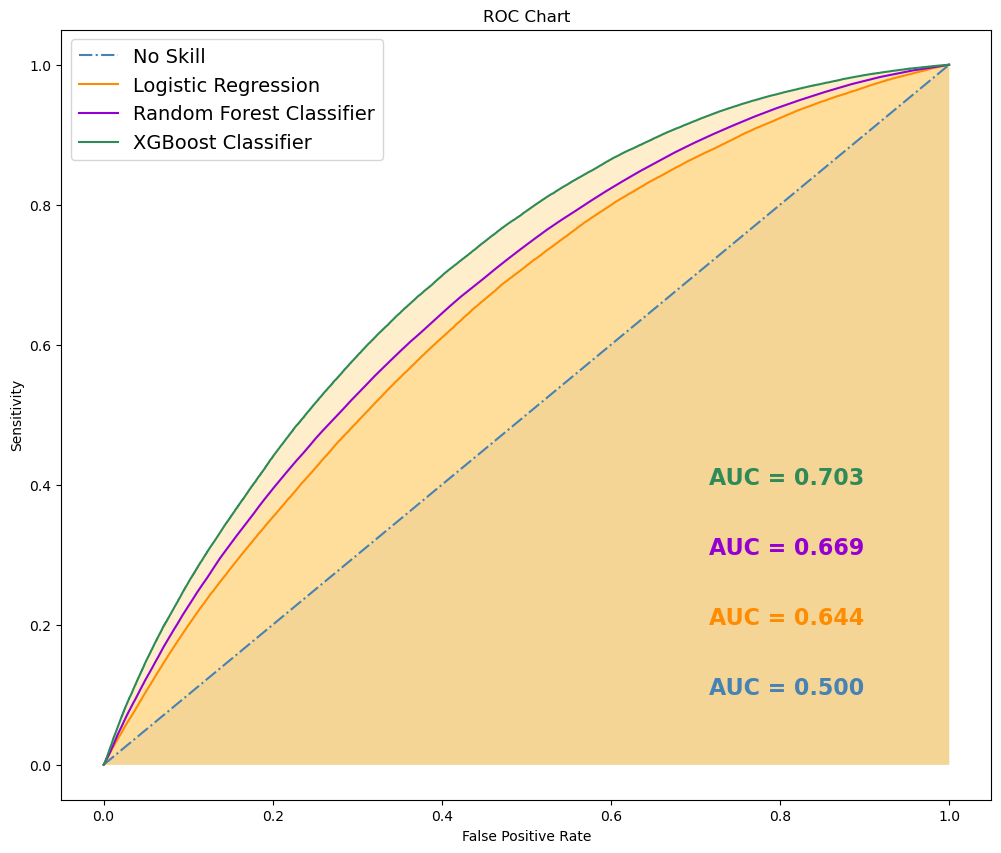

In [67]:
dict_names = {
    'lr_pred_proba': 'Logistic Regression',
    'rfc_pred_proba': 'Random Forest Classifier',
    'xgb_pred_proba': 'XGBoost Classifier'
}

colors = {
    'lr_pred_proba': '#FF8C00',
    'rfc_pred_proba': '#9400D3',
    'xgb_pred_proba': '#2E8B57'
}

plot_roc_curve(result['loan_status'], data=result, col_names=dict_names, colors=colors)


# Portfolio Expected Loss

In [68]:
result['ead'] = X_test['loan_amnt'].copy().reset_index(drop=True)
#result = result.drop('Unnamed: 0', axis=1)
result['lgd'] = 1 #asume lgd=1
result

,Unnamed: 0,loan_status,lr_pred,lr_pred_proba,rfc_pred,rfc_pred_proba,xgb_pred,xgb_pred_proba,ead,lgd
0,0,0,0,0.401562,0,0.110000,0,0.110036,12000.0,1
1,1,0,0,0.400780,0,0.320000,0,0.194388,18200.0,1
2,2,0,1,0.597234,0,0.185000,0,0.061081,26575.0,1
3,3,0,0,0.463055,0,0.045000,0,0.084704,8350.0,1
4,4,0,1,0.513750,0,0.177417,0,0.347166,35125.0,1
...,...,...,...,...,...,...,...,...,...,...
815582,815582,0,0,0.430485,0,0.045000,0,0.314230,35000.0,1
815583,815583,1,1,0.762306,0,0.070000,0,0.355317,23650.0,1
815584,815584,0,0,0.368246,0,0.085000,0,0.153255,25000.0,1
815585,815585,0,0,0.260506,0,0.060000,0,0.209107,25000.0,1


**EL = PD x LGD x EAD**

In [69]:
result['lr_expected_loss'] = result['lr_pred_proba'] * result['lgd'] * result['ead']
result['rfc_expected_loss'] = result['rfc_pred_proba'] * result['lgd'] * result['ead']
result['xgb_expected_loss'] = result['xgb_pred_proba'] * result['lgd'] * result['ead']
result

,Unnamed: 0,loan_status,lr_pred,lr_pred_proba,rfc_pred,rfc_pred_proba,xgb_pred,xgb_pred_proba,ead,lgd,lr_expected_loss,rfc_expected_loss,xgb_expected_loss
0,0,0,0,0.401562,0,0.110000,0,0.110036,12000.0,1,4818.739715,1320.000000,1320.430488
1,1,0,0,0.400780,0,0.320000,0,0.194388,18200.0,1,7294.199676,5824.000000,3537.867788
2,2,0,1,0.597234,0,0.185000,0,0.061081,26575.0,1,15871.501446,4916.375000,1623.236610
3,3,0,0,0.463055,0,0.045000,0,0.084704,8350.0,1,3866.512747,375.750000,707.277147
4,4,0,1,0.513750,0,0.177417,0,0.347166,35125.0,1,18045.485947,6231.760417,12194.212073
...,...,...,...,...,...,...,...,...,...,...,...,...,...
815582,815582,0,0,0.430485,0,0.045000,0,0.314230,35000.0,1,15066.986132,1575.000000,10998.038450
815583,815583,1,1,0.762306,0,0.070000,0,0.355317,23650.0,1,18028.527717,1655.500000,8403.244212
815584,815584,0,0,0.368246,0,0.085000,0,0.153255,25000.0,1,9206.145227,2125.000000,3831.381750
815585,815585,0,0,0.260506,0,0.060000,0,0.209107,25000.0,1,6512.641106,1500.000000,5227.681000


In [70]:
# Estimate total losses across each model
sum_loan_amount = result['ead'].sum()
sum_lr_expected_lost = result['lr_expected_loss'].sum()
sum_rfc_expected_lost = result['rfc_expected_loss'].sum()
sum_xgb_expected_lost = result['xgb_expected_loss'].sum()

print(f"Portfolio Amount: ${sum_loan_amount:,.2f}")
print(f"Logistic Regression Expected Loss: ${sum_lr_expected_lost:,.2f}")
print(f"Random Forest Classifier Expected Loss: ${sum_rfc_expected_lost:,.2f}")
print(f"XGB Classifier Expected Loss: ${sum_xgb_expected_lost:,.2f}")


Portfolio Amount: $12,710,965,700.00
Logistic Regression Expected Loss: $5,809,511,919.31
Random Forest Classifier Expected Loss: $2,124,284,490.15
XGB Classifier Expected Loss: $2,623,908,177.31
